In [1]:
#Stock Market (S&P 500) Sigma (standard deviation) Analysis
#created by John Broberg on 2022-05-29
#inspired by "LET THE WILD RUMPUS BEGIN" by JEREMY GRANTHAM of GMO
#ref. https://www.gmo.com/globalassets/articles/viewpoints/2022/gmo_let-the-wild-rumpus-begin_1-22.pdf

#source data: https://www.nasdaq.com/market-activity/index/spx/historical

#cd
#cd git/StockMarketSigma
#git pull https://github.com/JohnBroberg/StockMarketSigma.git


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

data = 'HistoricalData_1660745397514.csv'
df = pd.read_csv(data)

df


,Date,Close/Last,Volume,Open,High,Low
0,08/16/2022,4305.20,--,4290.46,4325.28,4277.77
1,08/15/2022,4297.14,--,4269.37,4301.79,4256.90
2,08/12/2022,4280.15,--,4225.02,4280.47,4219.78
3,08/11/2022,4207.27,--,4227.40,4257.91,4201.41
4,08/10/2022,4210.24,--,4181.02,4211.03,4177.26
...,...,...,...,...,...,...
2542,08/23/2012,1402.08,--,1413.49,1413.49,1400.50
2543,08/22/2012,1413.49,--,1413.09,1416.12,1406.78
2544,08/21/2012,1413.17,--,1418.13,1426.68,1410.86
2545,08/20/2012,1418.13,--,1417.85,1418.13,1412.12


In [2]:
df.describe()

,Close/Last,Open,High,Low
count,2547.000000,2547.000000,2547.000000,2547.000000
mean,2640.579395,2617.487915,2631.144280,2602.705524
std,876.465020,919.525234,925.677228,912.734701
min,1353.330000,0.000000,0.000000,0.000000
25%,1995.150000,1988.240000,1997.290000,1978.840000
50%,2440.690000,2442.500000,2450.660000,2431.280000
75%,3045.540000,3046.755000,3079.050000,3023.295000
max,4796.560000,4804.510000,4818.620000,4780.040000


In [3]:
#remove holidays (Open == 0)

df = df.loc[~(df['Open']==0)]
df.describe()

,Close/Last,Open,High,Low
count,2515.000000,2515.000000,2515.000000,2515.000000
mean,2651.299050,2650.791936,2664.622060,2635.821459
std,876.348819,876.340106,882.351505,869.693235
min,1353.330000,1353.360000,1360.620000,1343.350000
25%,2000.630000,2000.635000,2012.025000,1990.625000
50%,2460.610000,2459.500000,2468.620000,2443.770000
75%,3077.525000,3075.400000,3089.690000,3041.320000
max,4796.560000,4804.510000,4818.620000,4780.040000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2515 entries, 0 to 2546
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Date        2515 non-null   object 
 1   Close/Last  2515 non-null   float64
 2   Volume      2515 non-null   object 
 3   Open        2515 non-null   float64
 4   High        2515 non-null   float64
 5   Low         2515 non-null   float64
dtypes: float64(4), object(2)
memory usage: 137.5+ KB


In [5]:
df.shape

(2515, 6)

In [6]:
df.isnull().any()

Date          False
Close/Last    False
Volume        False
Open          False
High          False
Low           False
dtype: bool

<function matplotlib.pyplot.show(close=None, block=None)>

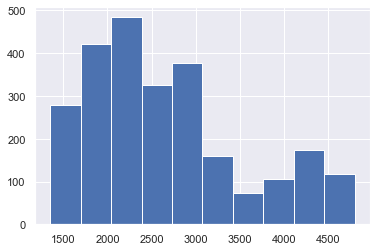

In [7]:
sns.set()

plt.hist(df['Close/Last'])
plt.show

In [8]:
close_current = df['Close/Last'].iloc[0]
close_current

4305.2

In [9]:
close_mean = df['Close/Last'].mean()
close_mean

2651.299049701799

In [10]:
close_sd = df['Close/Last'].std()
close_sd

876.3488188221193

In [11]:
sigma1 = close_mean + close_sd
sigma1

3527.647868523918

In [12]:
sigma2 = close_mean + (2 * close_sd)
sigma2

4403.996687346038

In [13]:
sigma3 = close_mean + (3 * close_sd)
sigma3

5280.345506168157

In [14]:
cols = ['Date','Close/Last']
df1 = df.loc[:,cols]
df1['Date'] = pd.to_datetime(df1['Date'], format = "%m/%d/%Y" )
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2515 entries, 0 to 2546
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Date        2515 non-null   datetime64[ns]
 1   Close/Last  2515 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 58.9 KB


In [15]:
#Date Range
date_start = min(df1['Date']).date()
date_end = max(df1['Date']).date()

Text(0.5, 1.0, 'S&P 500 Daily Close/Last - 2012-08-17 to 2022-08-16')

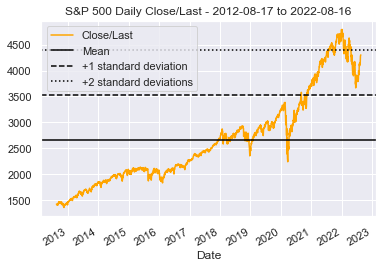

In [16]:
#Daily S&P 500 Close/Last, vs mean and standard deviations

if close_current > sigma2:
    c = 'red'
elif close_current > sigma1:
    c = 'orange'
else: 
    c = 'green'

df1.plot(x='Date', y='Close/Last', color = c)
plt.axhline(close_mean, color='black', label='Mean')
plt.axhline(sigma1, color='black', linestyle='--', label='+1 standard deviation')
plt.axhline(sigma2, color='black', linestyle=':', label='+2 standard deviations')
plt.legend()
plt.title(f'S&P 500 Daily Close/Last - {date_start} to {date_end}')

Text(0.5, 1.0, 'Density: S&P 500 Daily Close/Last - 2012-08-17 to 2022-08-16')

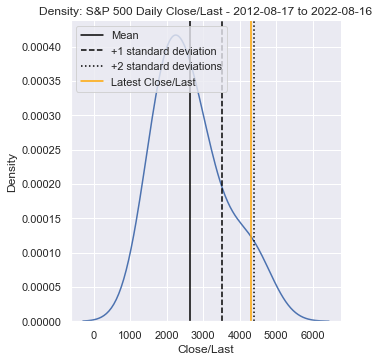

In [17]:
# Using Kernal Density Estimation (kde) to approximate probability density function
# https://seaborn.pydata.org/tutorial/distributions.html#kernel-density-estimation
#bw_adjust: adjust bandwidth to smoothe out modalities

sns.displot(df1['Close/Last'], kind='kde', bw_adjust=3.0) 

plt.axvline(close_mean, color='black', label='Mean')
plt.axvline(sigma1, color='black', linestyle='--', label='+1 standard deviation')
plt.axvline(sigma2, color='black', linestyle=':', label='+2 standard deviations')
plt.axvline(close_current, color=c, label='Latest Close/Last')
plt.legend(loc='upper left')
plt.title(f'Density: S&P 500 Daily Close/Last - {date_start} to {date_end}')

In [18]:
z_score = (close_current - close_mean)/close_sd
z_score

1.8872632846372428